In [2]:
import pandas as pd

eb=pd.read_csv('final_extrabladet_1732articles.csv')
tv2= pd.read_csv('final_dataset.csv')
dr= pd.read_csv('FINAL_dr_articles.csv')


In [3]:
tv2.drop(columns='Unnamed: 0', inplace=True)

In [6]:
eb.drop(columns='Unnamed: 0', inplace=True)

In [4]:
tv2.rename(columns={'Category': 'category', 'Authors':'author', 'Headline':'title','All_text':'body'}, inplace=True)

In [7]:
eb

,link,title,body,num_of_words,author,time,category,time_group
0,https://ekstrabladet.dk/krimi/bowlinghal-tilta...,Bowlinghal tiltalt for uagtsomt manddrab,I sommeren sidste år mistede en 29-årig mand l...,100,Signe Søgaard,2023-08-15 14:12:00,krimi,day
1,https://ekstrabladet.dk/krimi/snoevlende-mand-...,Snøvlende mand antastede og skubbede teenagepige,To teenagepiger fik sig mandag aften en forskr...,102,Emma Buus Mosegaard,2023-08-17 07:59:00,krimi,morning
2,https://ekstrabladet.dk/krimi/boederegn-181-bi...,Bøderegn: 181 bilister gået i fælden,"Skoleferien er ovre, og bilisterne er tilbage ...",102,Lasse Emil Stiigvad,2023-08-15 18:41:00,krimi,evening
3,https://ekstrabladet.dk/krimi/uheld-skaber-koe...,Uheld giver kø på motorvej,"Pendlere fra Nordsjælland, der skal mod Københ...",105,Emma Buus Mosegaard,2023-08-16 07:10:00,krimi,morning
4,https://ekstrabladet.dk/krimi/efterlyser-39-aa...,Efterlyser 39-årig: Mistænkt for trusler,I juli skulle 39-årige Christian Peder Majlund...,106,Petra Akullu Møller,2023-08-15 08:35:00,krimi,day
...,...,...,...,...,...,...,...,...
1727,https://ekstrabladet.dk/nyheder/samfund/famili...,Familie splittet: Mor til baby smidt ud,På første sal i en baggårdslejlighed i Helsing...,2366,Cecilie Guldberg,2023-03-08 12:14:00,samfund,day
1728,https://ekstrabladet.dk/nationen/langer-ud-toe...,Langer ud: Tøsedrenge,- FN´s klimapanel (IPCC) publicerede i august ...,2398,Thomas Harder,2021-09-12 21:34:00,sport,evening
1729,https://ekstrabladet.dk/nyheder/samfund/smidt-...,Smidt ud efter regel-koks: Forsøgte at tage si...,"Klokken er kvart over to om natten, og thailan...",2399,Cecilie Guldberg,2023-03-02 07:52:00,samfund,morning
1730,https://ekstrabladet.dk/nationen/helt-haabloes...,Helt håbløst: Projekt til 200 milliarder søger...,- Vi - Ib og Søren – skrev i Ekstra Bladets e-...,2692,Thomas Harder,2021-06-01 17:16:00,sport,evening


In [8]:
eb['category'] = eb['category'].str.lower()

In [9]:
tv2['category'] = tv2['category'].str.lower()

In [10]:
dr['category'] = dr['category'].str.lower()

In [11]:
#category 'nyheder' is grouped together with 'samfund'
dr['category'] = dr['category'].replace('nyheder', 'samfund')

In [12]:
# to be comparable with Extrabladet
tv2['category'] = tv2['category'].replace('vejr', 'vejret')

In [13]:
# number of words per category

# Group by 'category' and calculate the count for each group in 'eb' DataFrame
eb_category_counts = eb.groupby('category').size().reset_index(name='eb_count')

# Group by 'category' and calculate the count for each group in 'tv2' DataFrame
tv2_category_counts = tv2.groupby('category').size().reset_index(name='tv2_count')

# Group by 'category' and calculate the count for each group in 'dr' DataFrame
dr_category_counts = dr.groupby('category').size().reset_index(name='dr_count')

# Merge the counts from all three DataFrames based on the 'category' column
merged_counts = pd.merge(eb_category_counts, tv2_category_counts, on='category', how='outer')
merged_counts = pd.merge(merged_counts, dr_category_counts, on='category', how='outer')

# Fill missing values with 0
merged_counts.fillna(0, inplace=True)

# Calculate the total counts for each dataset
eb_total = merged_counts['eb_count'].sum()
tv2_total = merged_counts['tv2_count'].sum()
dr_total = merged_counts['dr_count'].sum()

# Calculate the percentage of total count for each dataset
merged_counts['eb_percent'] = (merged_counts['eb_count'] / eb_total) * 100
merged_counts['tv2_percent'] = (merged_counts['tv2_count'] / tv2_total) * 100
merged_counts['dr_percent'] = (merged_counts['dr_count'] / dr_total) * 100

# Add a row for total counts and percentages
total_row = {
    'category': 'Total',
    'eb_count': eb_total,
    'eb_percent': 100,
    'tv2_count': tv2_total,
    'tv2_percent': 100,
    'dr_count': dr_total,
    'dr_percent': 100
}
merged_counts_category = merged_counts.append(total_row, ignore_index=True)

# Print the resulting table
print(merged_counts_category)




        category  eb_count  tv2_count  dr_count  eb_percent  tv2_percent  \
0       business        27      653.0      57.0    1.558891     2.538584   
1          krimi       108     1162.0       0.0    6.235566     4.517358   
2          other        48      980.0       0.0    2.771363     3.809820   
3        politik       144     2027.0      85.0    8.314088     7.880107   
4        samfund       151     5707.0      61.0    8.718245    22.186370   
5          sport       292     4873.0      43.0   16.859122    18.944136   
6         udland        43     5360.0      64.0    2.482679    20.837383   
7  underholdning       884      190.0      56.0   51.039261     0.738639   
8         vejret        10     4771.0      41.0    0.577367    18.547603   
9      videnskab        25        0.0      23.0    1.443418     0.000000   

   dr_percent  
0   13.255814  
1    0.000000  
2    0.000000  
3   19.767442  
4   14.186047  
5   10.000000  
6   14.883721  
7   13.023256  
8    9.534884  
9  

C:\Users\lenovo\AppData\Local\Temp\ipykernel_24160\1169694672.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_counts_category = merged_counts.append(total_row, ignore_index=True)


In [14]:
merged_counts.to_excel('num_of_art2.xlsx')

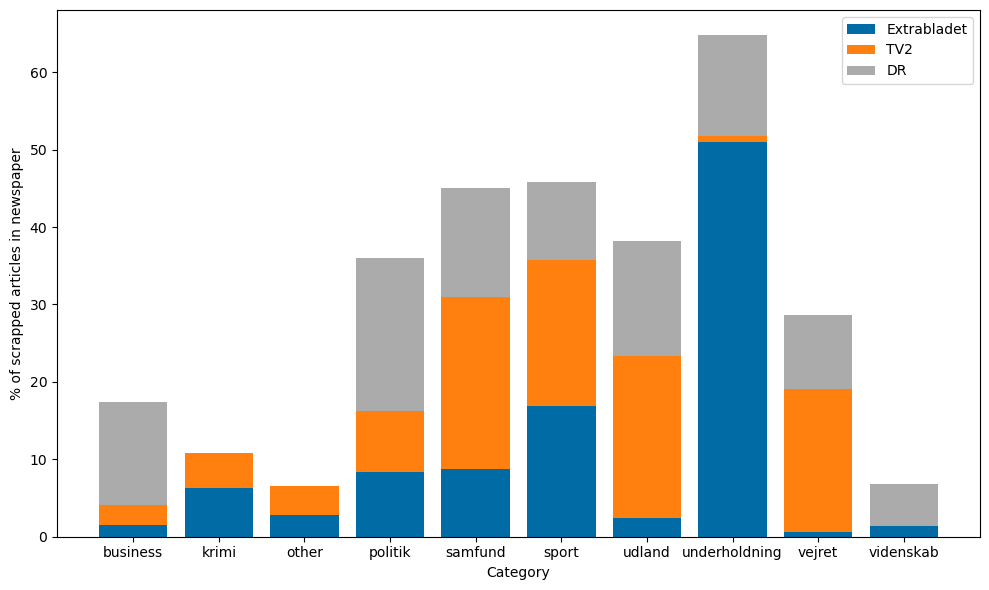

In [20]:
# number of words per category - plot

import matplotlib.pyplot as plt
import seaborn as sns

# Remove the 'Total' row from the DataFrame
filtered_counts = merged_counts_category[merged_counts_category['category'] != 'Total']

plt.style.use('tableau-colorblind10') 

plt.figure(figsize=(10, 6))
  

plt.bar(filtered_counts['category'], filtered_counts['eb_percent'], label='Extrabladet')
plt.bar(filtered_counts['category'], filtered_counts['tv2_percent'], bottom=filtered_counts['eb_percent'], label='TV2')
plt.bar(filtered_counts['category'], filtered_counts['dr_percent'], bottom=filtered_counts['eb_percent'] + filtered_counts['tv2_percent'], label='DR')

plt.xlabel('Category')
plt.ylabel('% of scrapped articles in newspaper')
plt.title('Distribution of articles by categories')
plt.legend()

plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig('categories_distribution_hist.png')
plt.show()


In [21]:
#grouping by 'Time_group' for the plot

eb_time_counts = eb.groupby('time_group').size().reset_index(name='eb_count')

tv2_time_counts = tv2.groupby('time_group').size().reset_index(name='tv2_count')

dr_time_counts = dr.groupby('time_group').size().reset_index(name='dr_count')

# Merge the counts from all three DataFrames 
merged_counts = pd.merge(eb_time_counts, tv2_time_counts, on='time_group', how='outer')
merged_counts = pd.merge(merged_counts, dr_time_counts, on='time_group', how='outer')

# Fill missing values with 0
merged_counts.fillna(0, inplace=True)

# Calculate the total counts for each dataset
eb_total = merged_counts['eb_count'].sum()
tv2_total = merged_counts['tv2_count'].sum()
dr_total = merged_counts['dr_count'].sum()

# Calculate the percentage of total count for each dataset
merged_counts['eb_percent'] = (merged_counts['eb_count'] / eb_total) * 100
merged_counts['tv2_percent'] = (merged_counts['tv2_count'] / tv2_total) * 100
merged_counts['dr_percent'] = (merged_counts['dr_count'] / dr_total) * 100

# Add a row for total counts and percentages
total_row = {
    'time_group': 'Total',
    'eb_count': eb_total,
    'eb_percent': 100,
    'tv2_count': tv2_total,
    'tv2_percent': 100,
    'dr_count': dr_total,
    'dr_percent': 100
}
merged_counts_time = merged_counts.append(total_row, ignore_index=True)

# Print the resulting table
print(merged_counts_time)




  time_group  eb_count  tv2_count  dr_count  eb_percent  tv2_percent  \
0        day       809      10335       137   46.709007    40.178051   
1    evening       682      10279       204   39.376443    39.960347   
2    morning       241       5109        89   13.914550    19.861602   
3      Total      1732      25723       430  100.000000   100.000000   

   dr_percent  
0   31.860465  
1   47.441860  
2   20.697674  
3  100.000000  


C:\Users\lenovo\AppData\Local\Temp\ipykernel_24160\4205562362.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_counts_time = merged_counts.append(total_row, ignore_index=True)


In [22]:
# Remove the 'Total' row from the DataFrame
time_plot = merged_counts_time[merged_counts_time['time_group'] != 'Total']
time_plot.drop(columns=['eb_count','tv2_count','dr_count'], inplace=True)
time_plot

C:\Users\lenovo\AppData\Local\Temp\ipykernel_24160\3903632646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_plot.drop(columns=['eb_count','tv2_count','dr_count'], inplace=True)


,time_group,eb_percent,tv2_percent,dr_percent
0,day,46.709007,40.178051,31.860465
1,evening,39.376443,39.960347,47.441860
2,morning,13.914550,19.861602,20.697674


In [46]:
merged_counts_time
time1 = merged_counts_time[merged_counts_time['time_group'] != 'Total']
time1.drop(columns=['eb_count','tv2_count','dr_count'], inplace=True)
time1

C:\Users\lenovo\AppData\Local\Temp\ipykernel_24160\1278607746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time1.drop(columns=['eb_count','tv2_count','dr_count'], inplace=True)


,time_group,eb_percent,tv2_percent,dr_percent
0,day,46.709007,40.178051,31.860465
1,evening,39.376443,39.960347,47.441860
2,morning,13.914550,19.861602,20.697674


In [47]:
time1.rename(columns={'eb_percent': 'Extrabladet', 'tv2_percent': 'TV2', 'dr_percent': 'DR'}, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_24160\3886156013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time1.rename(columns={'eb_percent': 'Extrabladet', 'tv2_percent': 'TV2', 'dr_percent': 'DR'}, inplace=True)


In [48]:
time1

,time_group,Extrabladet,TV2,DR
0,day,46.709007,40.178051,31.860465
1,evening,39.376443,39.960347,47.441860
2,morning,13.914550,19.861602,20.697674


In [49]:
time2= time1.set_index('time_group')
time2

,Extrabladet,TV2,DR
time_group,,,
day,46.709007,40.178051,31.860465
evening,39.376443,39.960347,47.441860
morning,13.914550,19.861602,20.697674


<Figure size 800x400 with 0 Axes>

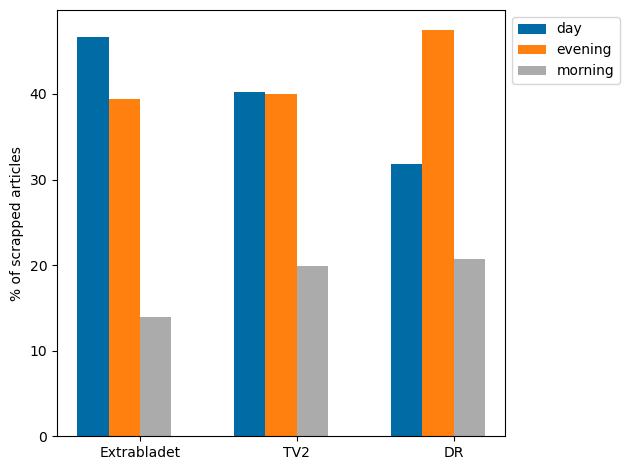

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.figure(figsize=(8, 4))
fig, ax = plt.subplots()
bar_width = 0.2
x_positions = np.arange(len(time1))

for i, row in enumerate(time1.iterrows()):
    ax.bar(x_positions + i * bar_width, row[1][1:].values, bar_width, label=row[1]['time_group'])

ax.set_xticks(x_positions + (len(time1.columns) - 1) * bar_width / 2)
ax.set_xticklabels(time1.columns[1:])
ax.set_ylabel("% of scrapped articles")
ax.set_title("Distribution of publications in time")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [122]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [56]:
time2

,Extrabladet,TV2,DR
time_group,,,
day,46.709007,40.178051,31.860465
evening,39.376443,39.960347,47.441860
morning,13.914550,19.861602,20.697674


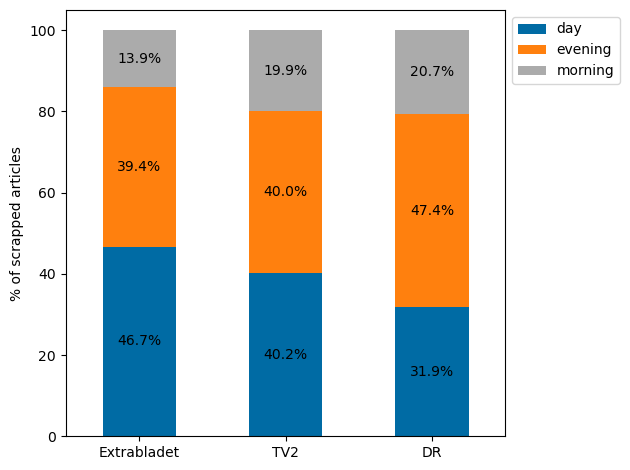

In [104]:
# distribution by 'time of publication'

df_transposed = time2.transpose()


ax = df_transposed.plot(kind='bar', stacked=True)

for p in ax.patches:   #add values on the plot
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

ax.set_ylabel("% of scrapped articles")
#ax.set_title("Time Group Distribution by News Source")
plt.xticks(rotation=0)
plt.legend(title='Time Group')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()


plt.savefig('time_distribution_hist.png')
plt.show()

In [60]:
eb_gender= pd.read_csv('ekstrabladet_withgenderlix.csv')

In [64]:
eb_gender.drop(columns=['Unnamed: 0'], inplace=True)

In [65]:
eb_gender

,link,title,body,num_of_words,author,time,category,time_group,first_name,Boy,Girl,Nyhedsbureau,LIX_body,LIX_Headline
0,https://ekstrabladet.dk/krimi/bowlinghal-tilta...,Bowlinghal tiltalt for uagtsomt manddrab,I sommeren sidste år mistede en 29-årig mand l...,100,Signe Søgaard,2023-08-15 14:12:00,krimi,day,Signe,0,1,0,42.386340,85.000000
1,https://ekstrabladet.dk/krimi/snoevlende-mand-...,Snøvlende mand antastede og skubbede teenagepige,To teenagepiger fik sig mandag aften en forskr...,102,Emma Buus Mosegaard,2023-08-17 07:59:00,krimi,morning,Emma,0,1,0,42.824324,72.666667
2,https://ekstrabladet.dk/krimi/boederegn-181-bi...,Bøderegn: 181 bilister gået i fælden,"Skoleferien er ovre, og bilisterne er tilbage ...",102,Lasse Emil Stiigvad,2023-08-15 18:41:00,krimi,evening,Lasse,1,0,0,36.724868,39.333333
3,https://ekstrabladet.dk/krimi/uheld-skaber-koe...,Uheld giver kø på motorvej,"Pendlere fra Nordsjælland, der skal mod Københ...",105,Emma Buus Mosegaard,2023-08-16 07:10:00,krimi,morning,Emma,0,1,0,35.756757,25.000000
4,https://ekstrabladet.dk/krimi/efterlyser-39-aa...,Efterlyser 39-årig: Mistænkt for trusler,I juli skulle 39-årige Christian Peder Majlund...,106,Petra Akullu Møller,2023-08-15 08:35:00,krimi,day,Petra,0,1,0,42.199234,56.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,https://ekstrabladet.dk/nyheder/samfund/famili...,Familie splittet: Mor til baby smidt ud,På første sal i en baggårdslejlighed i Helsing...,2366,Cecilie Guldberg,2023-03-08 12:14:00,samfund,day,Cecilie,0,1,0,42.249066,35.571429
1728,https://ekstrabladet.dk/nationen/langer-ud-toe...,Langer ud: Tøsedrenge,- FN´s klimapanel (IPCC) publicerede i august ...,2398,Thomas Harder,2021-09-12 21:34:00,sport,evening,Thomas,1,0,0,43.558901,36.333333
1729,https://ekstrabladet.dk/nyheder/samfund/smidt-...,Smidt ud efter regel-koks: Forsøgte at tage si...,"Klokken er kvart over to om natten, og thailan...",2399,Cecilie Guldberg,2023-03-02 07:52:00,samfund,morning,Cecilie,0,1,0,40.512540,20.090909
1730,https://ekstrabladet.dk/nationen/helt-haabloes...,Helt håbløst: Projekt til 200 milliarder søger...,- Vi - Ib og Søren – skrev i Ekstra Bladets e-...,2692,Thomas Harder,2021-06-01 17:16:00,sport,evening,Thomas,1,0,0,45.140999,45.500000


In [75]:
# gender distibution

boys_tv2 = tv2[(tv2['Boy'] == 1) & (tv2['Girl'] == 0) & (tv2['Nyhedsbureau'] == 0)].shape[0]
girls_tv2 = tv2[(tv2['Boy'] == 0) & (tv2['Girl'] == 1) & (tv2['Nyhedsbureau'] == 0)].shape[0]
bureau_tv2 = tv2[(tv2['Boy'] == 0) & (tv2['Girl'] == 0) & (tv2['Nyhedsbureau'] == 1)].shape[0]
total_tv2  = boys_tv2+ girls_tv2 +bureau_tv2 

print("Boys TV2:", boys_tv2)
print("Girls TV2:", girls_tv2)
print("Nyhedsbureau:", bureau_tv2)
print("Total:", total_tv2)
print("Missing value:" ,25723 - total_tv2)

Boys TV2: 13116
Girls TV2: 5667
Nyhedsbureau: 6430
Total: 25213
Missing value: 510


In [76]:
boys_eb_gender = eb_gender[(eb_gender['Boy'] == 1) & (eb_gender['Girl'] == 0) & (eb_gender['Nyhedsbureau'] == 0)].shape[0]
girls_eb_gender = eb_gender[(eb_gender['Boy'] == 0) & (eb_gender['Girl'] == 1) & (eb_gender['Nyhedsbureau'] == 0)].shape[0]
bureau_eb_gender = eb_gender[(eb_gender['Boy'] == 0) & (eb_gender['Girl'] == 0) & (eb_gender['Nyhedsbureau'] == 1)].shape[0]
total_eb_gender  = boys_eb_gender+ girls_eb_gender +bureau_eb_gender 

print("Boys EB_GENDER:", boys_eb_gender)
print("Girls EB_GENDER:", girls_eb_gender)
print("Nyhedsbureau:", bureau_eb_gender)
print("Total:", total_eb_gender)
print("Missing value:" ,1732 - total_eb_gender)



Boys EB_GENDER: 1009
Girls EB_GENDER: 464
Nyhedsbureau: 220
Total: 1693
Missing value: 39


In [78]:
boys_dr = dr[(dr['Boy'] == 1) & (dr['Girl'] == 0) & (dr['Nyhedsbureau'] == 0)].shape[0]
girls_dr = dr[(dr['Boy'] == 0) & (dr['Girl'] == 1) & (dr['Nyhedsbureau'] == 0)].shape[0]
bureau_dr = dr[(dr['Boy'] == 0) & (dr['Girl'] == 0) & (dr['Nyhedsbureau'] == 1)].shape[0]
total_dr  = boys_dr+ girls_dr +bureau_dr 

print("Boys DR:", boys_dr)
print("Girls DR:", girls_dr)
print("Nyhedsbureau:", bureau_dr)
print("Total:", total_dr)
print("Missing value:" ,430 - total_dr)


Boys DR: 265
Girls DR: 136
Nyhedsbureau: 4
Total: 405
Missing value: 25


In [81]:
# table for Gender plot
data = {
    'Gender': ['Male', 'Female', 'Nyhedsbureau', 'Missing value', 'Total'],
    'TV2': [boys_tv2, girls_tv2, bureau_tv2, 25723 - total_tv2, total_tv2 ],
    'Extrabladet': [boys_eb_gender, girls_eb_gender, bureau_eb_gender, 1732 - total_eb_gender, total_eb_gender ],
    'DR': [boys_dr, girls_dr, bureau_dr, 430 - total_dr, total_dr]
}

gender = pd.DataFrame(data)
gender

,Gender,TV2,Extrabladet,DR
0,Male,13116,1009,265
1,Female,5667,464,136
2,Nyhedsbureau,6430,220,4
3,Missing value,510,39,25
4,Total,25213,1693,405


In [83]:
gender.set_index('Gender', inplace=True)

In [93]:
# Remove the 'Total' row from the DataFrame
gender = gender.drop('Total')

In [94]:
gender

,TV2,Extrabladet,DR
Gender,,,
Male,13116,1009,265
Female,5667,464,136
Nyhedsbureau,6430,220,4
Missing value,510,39,25


In [97]:
column_totals = gender.sum()

# Calculate the percentage shares
gender_percent = gender.div(column_totals) * 100
gender_percent

,TV2,Extrabladet,DR
Gender,,,
Male,50.989387,58.256351,61.627907
Female,22.030867,26.789838,31.627907
Nyhedsbureau,24.997084,12.702079,0.930233
Missing value,1.982661,2.251732,5.813953


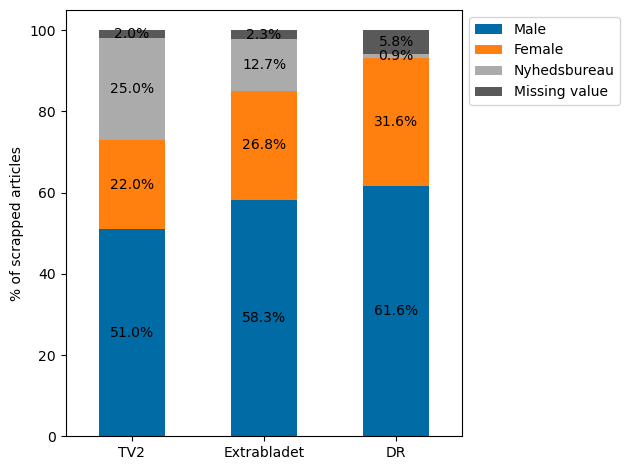

In [100]:
#distibution of genger

ax = gender_transposed.plot(kind='bar', stacked=True)

# Add percent numbers inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

ax.set_ylabel("% of scrapped articles")
plt.xticks(rotation=0)
plt.legend(title='Time Group')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.savefig('gender_distribution_hist.png')
plt.show()

In [110]:
# correlation matrix plot

cor = pd.read_excel('correlation.xlsx')
cor.set_index('Variable', inplace=True)
cor


,LIX,Live,Time,Nyhedsbureau,Headline,Business,Krimi,Politik,Samfund,Sport,Udland,Underholdning,Vejr,IsBoy
Variable,,,,,,,,,,,,,,
LIX,1.000,0.010,-0.009,0.166,0.281,0.054,0.005,0.084,0.041,-0.321,0.352,-0.020,-0.176,-0.228
Live,0.010,1.000,-0.049,-0.016,0.023,-0.006,0.001,0.000,0.014,-0.016,0.019,-0.003,-0.016,-0.015
Time,-0.009,-0.049,1.000,-0.143,0.025,0.005,-0.007,0.022,0.004,0.078,-0.078,0.048,-0.017,0.088
Nyhedsbureau,0.166,-0.016,-0.143,1.000,0.094,0.023,0.147,-0.015,-0.022,0.039,0.204,-0.051,-0.277,-0.622
Headline,0.281,0.023,0.025,0.094,1.000,0.014,0.002,0.058,0.060,-0.044,0.123,-0.030,-0.196,-0.127
Business,0.054,-0.006,0.005,0.023,0.014,1.000,-0.035,-0.048,-0.087,-0.080,-0.082,-0.014,-0.078,-0.035
Krimi,0.005,0.001,-0.007,0.147,0.002,-0.035,1.000,-0.063,-0.116,-0.106,-0.109,-0.019,-0.104,-0.151
Politik,0.084,0.000,0.022,-0.015,0.058,-0.048,-0.063,1.000,-0.156,-0.142,-0.147,-0.025,-0.140,-0.170
Samfund,0.041,0.014,0.004,-0.022,0.060,-0.087,-0.116,-0.156,1.000,-0.261,-0.269,-0.046,-0.257,-0.150


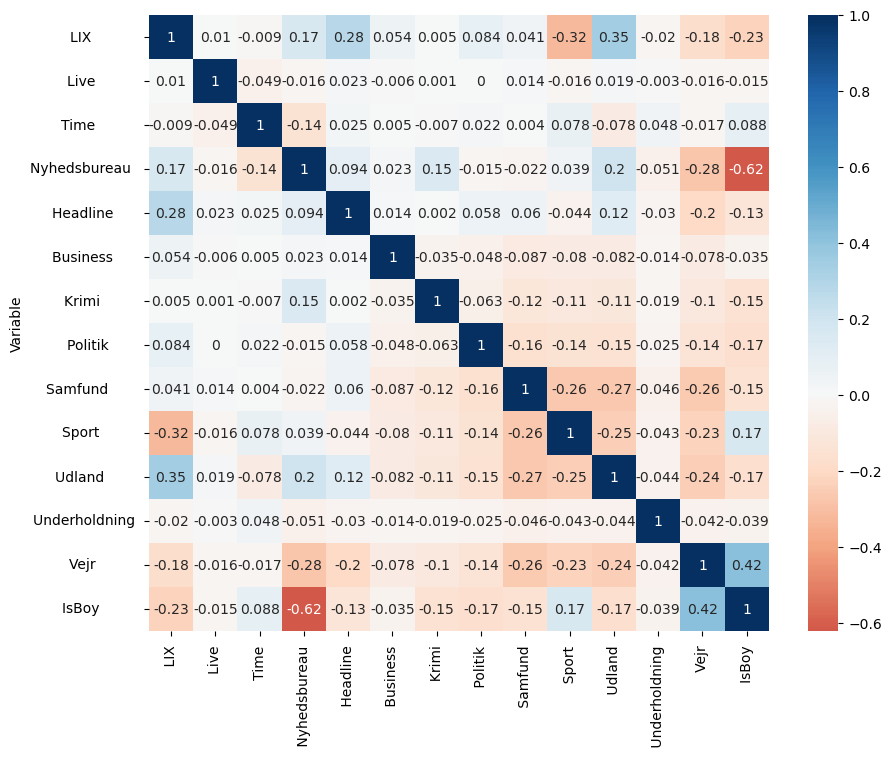

In [121]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='RdBu', center=0)
plt.title("Correlation Matrix")

plt.savefig('correlation_pic.png')

plt.show()